# Stock Revenue Analysis and Dashboard using Python

## Project Overview
This project extracts, cleans, and visualizes historical stock and revenue data for Tesla and GameStop.  
The objective is to compare financial performance trends and explore relationships between company revenue and stock price behavior.

## Technologies Used
- Python
- Pandas
- Matplotlib
- yfinance
- BeautifulSoup


Gathering Required Libraries

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

Warnings related to future library changes are suppressed to keep the notebook output clean.

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Visualization Function

A reusable function is created to plot stock price and revenue trends for each company.


In [4]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

Historical stock price data for `Tesla` is retrieved using the yfinance library.

In [5]:
Tesla = yf.Ticker("TSLA")

In [6]:
Tesla_Data = Tesla.history(period="max")

In [7]:
Tesla_Data.reset_index(inplace=True)
Tesla_Data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Revenue data for `Tesla` is scraped from an online financial dataset using requests and BeautifulSoup.

In [8]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(URL)
html_data = response.text

In [9]:
soup = BeautifulSoup(html_data, "html.parser")

In [10]:
Tesla_Revenue = pd.DataFrame(columns=["Date", "Revenue"])
Table = soup.find_all("tbody")[1]

for row in Table.find_all("tr"):
    cols = row.find_all("td")

    if len(cols)!=0:
        Date = cols[0].text.strip()
        Revenue = cols[1].text.strip()

        Tesla_Revenue = pd.concat([Tesla_Revenue, pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

In [12]:
Tesla_Revenue["Revenue"] = Tesla_Revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [13]:
Tesla_Revenue.dropna(inplace=True)

Tesla_Revenue = Tesla_Revenue[Tesla_Revenue['Revenue'] != ""]

Preview of the cleaned `Tesla` revenue dataset.

In [14]:
Tesla_Revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Historical stock price data for `GameStop` is retrieved using the yfinance library.

In [15]:
GameStop = yf.Ticker("GME")

In [16]:
gme_data = GameStop.history(period="max")

In [17]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Revenue data for `GameStop` is scraped from an online financial dataset using requests and BeautifulSoup.

In [19]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

reponse = requests.get(URL)
html_data_2 = response.text

In [20]:
soup = BeautifulSoup(html_data_2, "html.parser")

In [34]:
GameStopRevenue = pd.DataFrame(columns = ["Date", "Revenue"])
Table = soup.find_all("tbody")[1]

for row in Table.find_all("tr"):
    cols = Table.find_all("td")
    
    if len(cols)!=0:
        Date = cols[0].text.strip()
        Revenue = cols[1].text.strip()

        GameStopRevenue = pd.concat([GameStopRevenue, pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

In [35]:
GameStopRevenue["Revenue"] = GameStopRevenue["Revenue"].str.replace(',|\$',"",regex=True)
GameStopRevenue.dropna(inplace=True)
GameStopRevenue= GameStopRevenue[GameStopRevenue["Revenue"] != ""] 

Preview of the cleaned `GameStop` revenue dataset.

In [36]:
GameStopRevenue.tail()

,Date,Revenue
49,2022-09-30,21454
50,2022-09-30,21454
51,2022-09-30,21454
52,2022-09-30,21454
53,2022-09-30,21454


Visualization of `Tesla` stock price vs revenue over time.

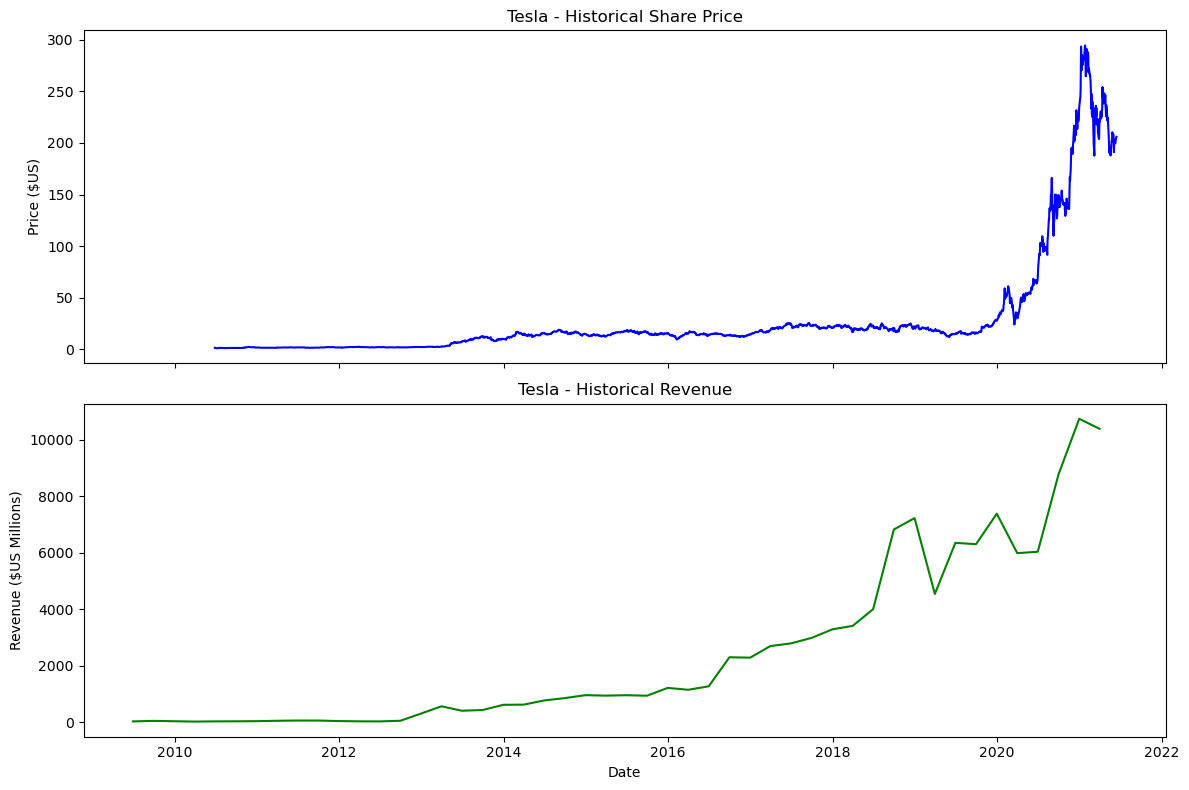

In [23]:
make_graph(Tesla_Data, Tesla_Revenue, "Tesla")

Visualization of `GameStop` stock price vs revenue over time.

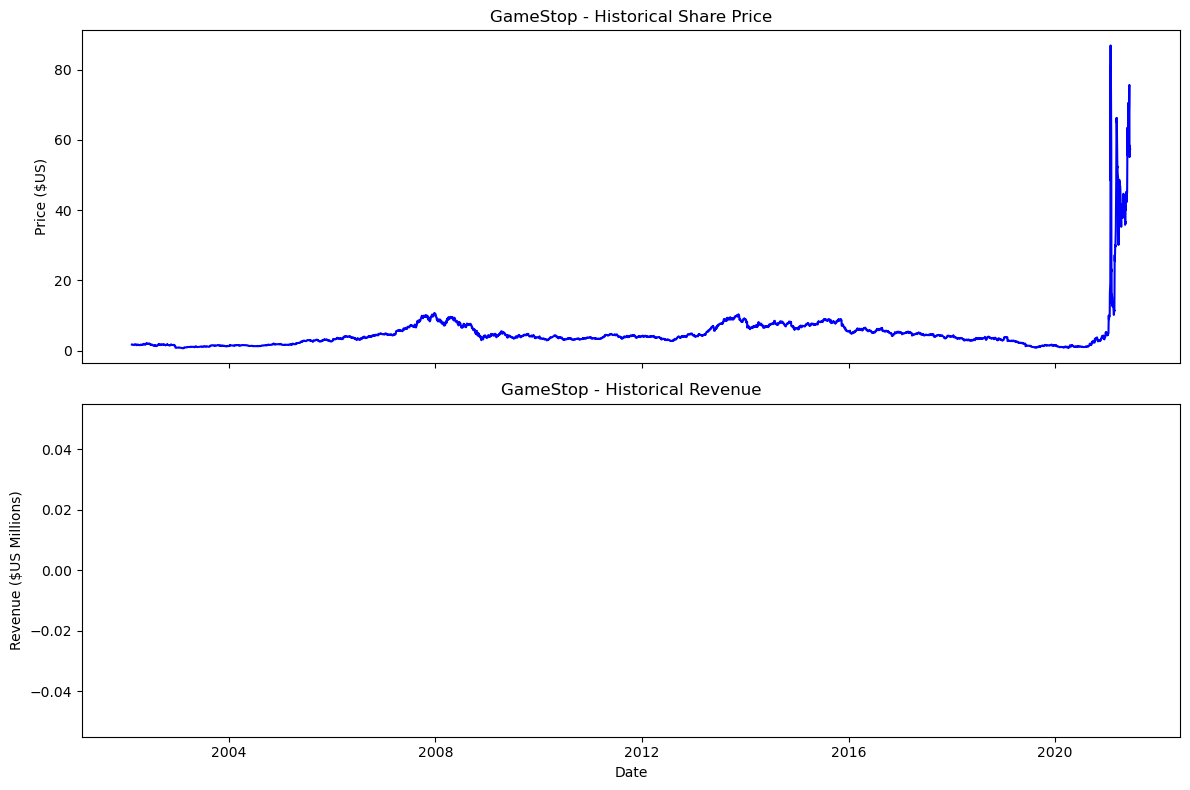

In [37]:
make_graph(gme_data, GameStopRevenue, "GameStop")

The GameStop revenue graph was blank because the date filter (Date <= 2021-04-30) removed all rows from the GameStopRevenue DataFrame, leaving no data points to plot. Adjusting or removing the cutoff date restores the graph.

**Author**: *Adit Rastogi*